## Problem Description

A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Hypothesis Generation

Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome i.e. which of the features will have an impact on whether a loan will be approved or not. Some of the hypothesis are:

Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval

Income: Applicants with higher income should have more chances of loan approval

Loan amount: If the loan amount is less, the chances of loan approval should be high

Loan term: Loans with shorter time period should have higher chances of approval

Credit history: Applicants who have repayed their previous debts should have higher chances of loan approval

Some of the hypothesis seem intuitive while others may not. We will try to validate each of these hypothesis based on the dataset.

# EDA ( Exploratory Data Analysis )

In [900]:
#importing required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import cufflinks as cf
cf.go_offline()

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [901]:
# Loading the train dataset
train_df=pd.read_csv('train_loan.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [902]:
# Loading the test dataset
test_df=pd.read_csv('loan_test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [903]:
# Getting shape of the dataset
train_df.shape

(614, 13)

In [904]:
# Getting column names of the dataset
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [905]:
# Getting the information of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Statistical Analysis

In [906]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### DATA PREPARATION

In [907]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

 - For numerical variables: imputation using mean or median
    
 - For categorical variables: imputation using mode
    
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [908]:
#close to 25% data is missing. Hence can't delete data. Replacing values:
#Only one numerical column- loan amount

train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)

train_df['Self_Employed'].fillna('No',inplace=True)
test_df['Self_Employed'].fillna('No',inplace=True)

train_df['Gender'].fillna('Male',inplace=True)
test_df['Gender'].fillna('Male',inplace=True)

train_df['Dependents'].fillna("0",inplace=True)
test_df['Dependents'].fillna("0",inplace=True)

train_df['Married'].fillna('yes',inplace=True)
test_df['Married'].fillna('yes',inplace=True)

train_df['Loan_Amount_Term'].fillna("360.0",inplace=True)
test_df['Loan_Amount_Term'].fillna("360.0",inplace=True)

train_df['Credit_History'].fillna("360.0",inplace=True)
test_df['Credit_History'].fillna("360.0",inplace=True)

train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [909]:
train_df.duplicated().any()

False

# Data Visualization

### Univariate analysis

Univariate analysis is when we analyze each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution. Note that a histogram can’t show you if you have any outliers. This is why we also use box-plots.

In [910]:
train_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y


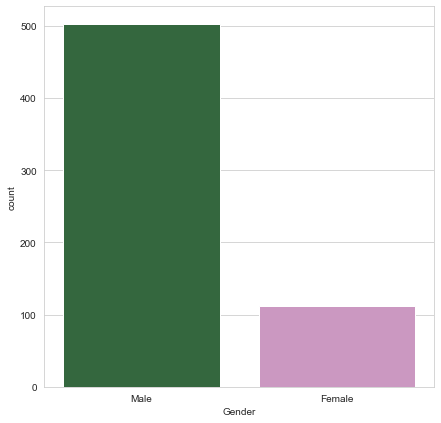

In [911]:
fig=plt.figure(figsize=(7,7))
sns.countplot(data=train_df,x='Gender',palette='cubehelix')

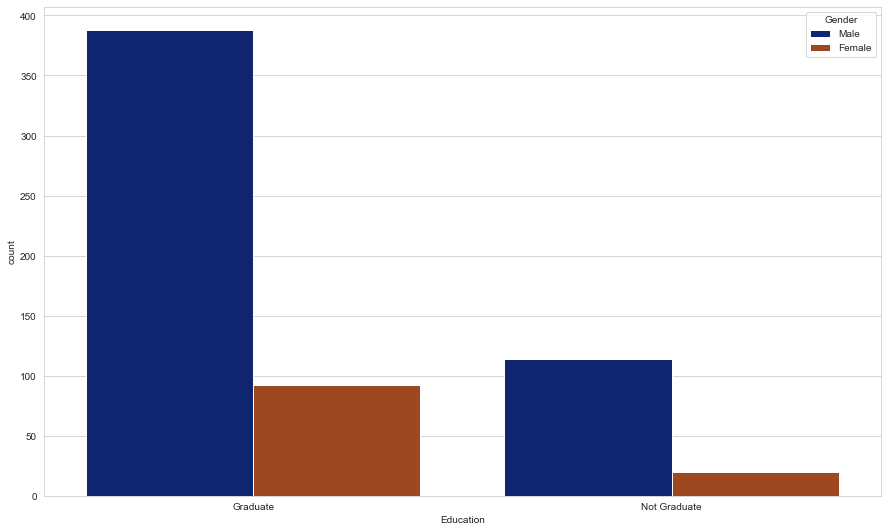

In [912]:
fig=plt.figure(figsize=(15,9))
sns.countplot(data=train_df,x='Education',hue='Gender',palette='dark')

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


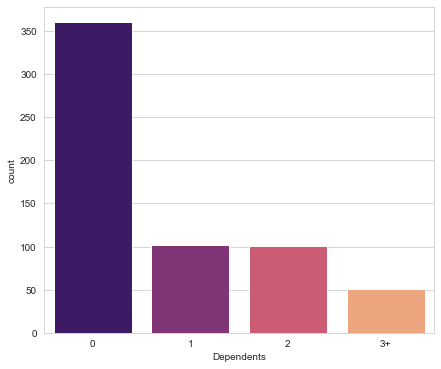

In [913]:
print(train_df.Dependents.value_counts())
fig=plt.figure(figsize=(7,6))
sns.countplot(data=train_df,x='Dependents',palette='magma')

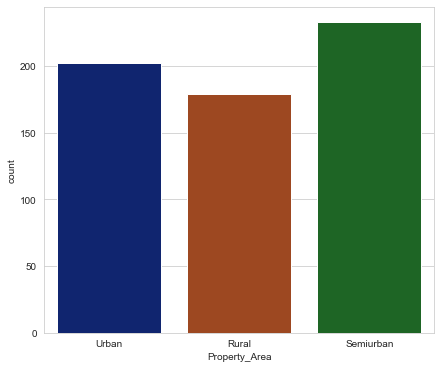

In [914]:
fig=plt.figure(figsize=(7,6))
sns.countplot(data=train_df,x='Property_Area',palette='dark')


Y    422
N    192
Name: Loan_Status, dtype: int64


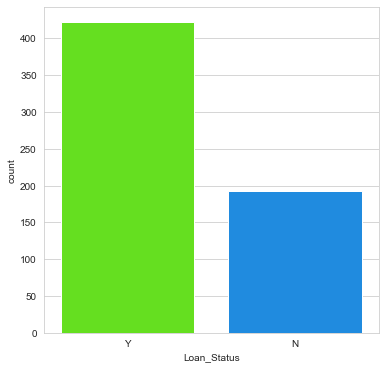

In [915]:
Loan_Status_distribution=train_df.Loan_Status.value_counts()
print(Loan_Status_distribution)
fig=plt.figure(figsize=(6,6))
sns.countplot(data=train_df,x='Loan_Status',palette='gist_rainbow')

Note: The loan of 422 (around 69%) people out of 614 was approved. There is no imbalanced classes issue in this dataset, thus accuracy as an evaluation metric should be appropriate. On the other hand, if there are imbalanced or skewed classes, then we might need to use precision and recall as evaluation metrics.

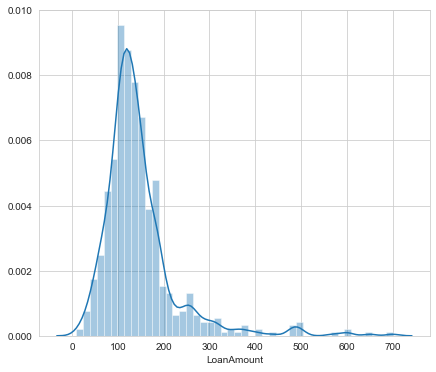

In [916]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(7,6))
sns.distplot(train_df['LoanAmount'])


We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

#### Bivariate Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


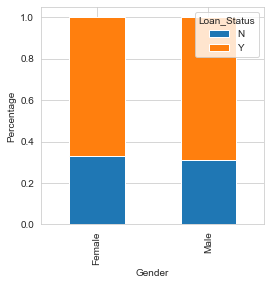

In [917]:
print(pd.crosstab(train_df['Gender'],train_df['Loan_Status']))

Gender = pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


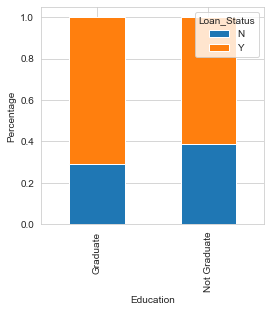

In [918]:
print(pd.crosstab(train_df['Education'],train_df['Loan_Status']))

Education=pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


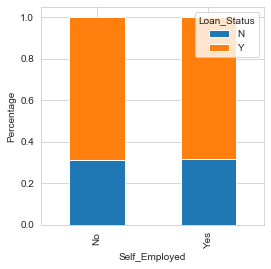

In [919]:
print(pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status']))

Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
360.0           13   37


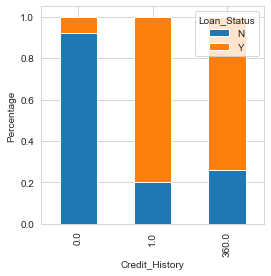

In [920]:
print(pd.crosstab(train_df['Credit_History'],train_df['Loan_Status']))

Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


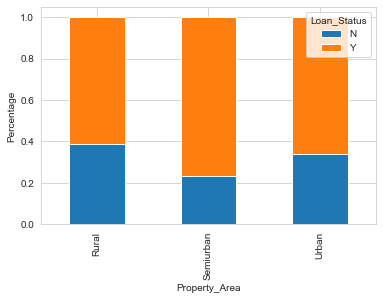

In [921]:
print(pd.crosstab(train_df['Property_Area'],train_df['Loan_Status']))

Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

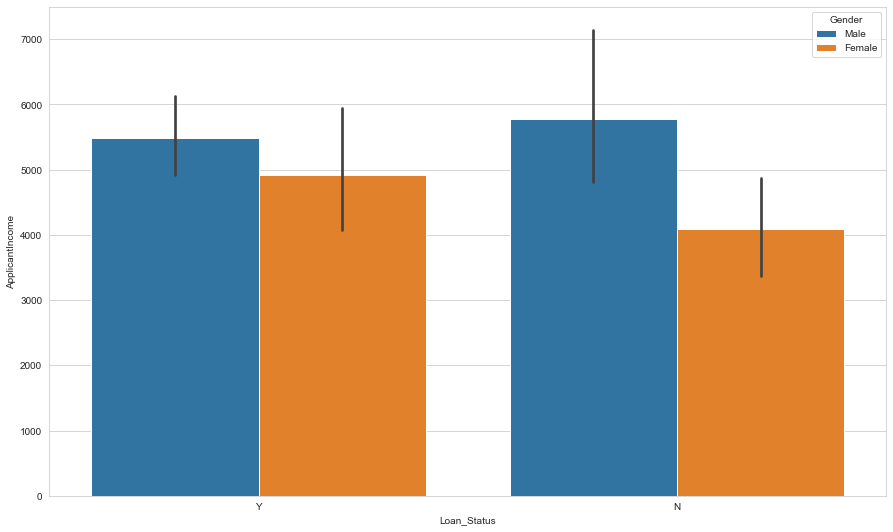

In [922]:
fig=plt.figure(figsize=(15,9))
sns.barplot(data=train_df,x='Loan_Status',y='ApplicantIncome',hue='Gender')

From the bar charts above, it can be inferred that:

   - proportion of male and female applicants is more or less same for both          approved and unapproved loans

   - there is nothing significant we can infer from Self_Employed vs                Loan_Status plot.

   - proportion of loans getting approved for graduates is higher compared to        non-graduates

   - it seems people with credit history as 1 are more likely to get their          loans approved

   - proportion of loans getting approved in semiurban area is higher as            compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

### Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

Text(0.5, 1.0, 'Test')

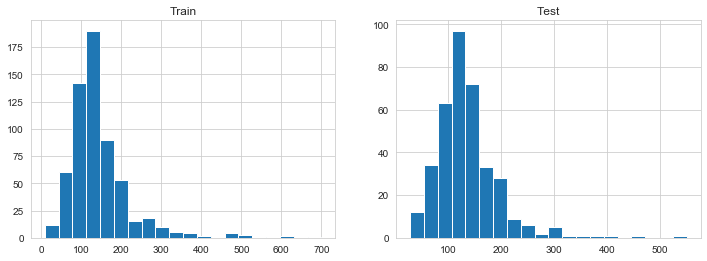

In [923]:
ax1 = plt.subplot(121)
train_df['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test_df['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [924]:
# Removing skewness in LoanAmount variable by log transformation
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

Text(0.5, 1.0, 'Test')

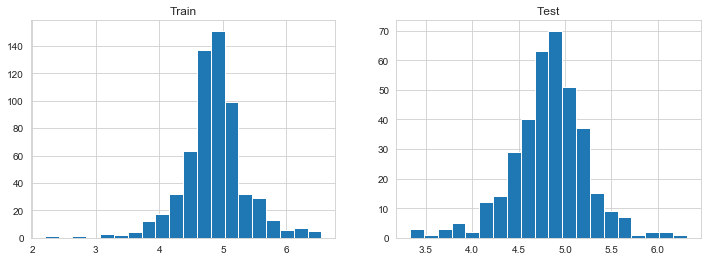

In [925]:
# After log transformation
ax1 = plt.subplot(121)
train_df['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test_df['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

Converting categorical data into numerical data

Most Machine learning algorithms require number as input. That is why we convert categorical values into factors to get numerical values.

In [926]:
numerical=test_df.select_dtypes(exclude=['object'])
categorical=test_df.select_dtypes(include=['object'])
le=LabelEncoder()
encoded=categorical.astype(str).apply(le.fit_transform)
test_df=pd.concat([numerical,encoded],axis=1)
test_df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_log,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,5720,0,110.0,4.700480,0,1,1,0,0,0,7,1,2
1,3076,1500,126.0,4.836282,1,1,1,1,0,0,7,1,2
2,5000,1800,208.0,5.337538,2,1,1,2,0,0,7,1,2
3,2340,2546,100.0,4.605170,3,1,1,2,0,0,7,2,2
4,3276,0,78.0,4.356709,4,1,0,0,1,0,7,1,2


In [927]:
numerical=train_df.select_dtypes(exclude=['object'])
categorical=train_df.select_dtypes(include=['object'])
le=LabelEncoder()
encoded=categorical.astype(str).apply(le.fit_transform)
train_df=pd.concat([numerical,encoded],axis=1)
train_df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_log,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,5849,0.0,146.412162,4.986426,0,1,0,0,0,0,6,1,2,1
1,4583,1508.0,128.000000,4.852030,1,1,1,1,0,0,6,1,0,0
2,3000,0.0,66.000000,4.189655,2,1,1,0,0,1,6,1,2,1
3,2583,2358.0,120.000000,4.787492,3,1,1,0,1,0,6,1,2,1
4,6000,0.0,141.000000,4.948760,4,1,0,0,0,0,6,1,2,1


After converting the categorical values into numerical, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and Gaussian.

We will build the following models in this section.

 - Logistic Regression

 - Gaussian

 - Random Forest

Let’s prepare the data for feeding into the models.

In [928]:
X= train_df.drop('Loan_Status',axis=1)
y=train_df['Loan_Status']

In [929]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (411, 13)
X_test shape: (203, 13)
y_train shape: (411,)
y_test shape: (203,)


## LOGISTIC REGRESSION

In [930]:
#training the model
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [931]:
#model evaluation
x_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.8102189781021898


Logistic Regression Model
    
The chances of getting a loan will be higher for:

    • Applicants having a credit history (we observed this in exploration.)
    
    • Applicants with higher applicant and co-applicant incomes
    
    • Applicants with higher education level
    
    • Properties in urban areas with high growth perspectives

In [932]:
x_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on Testing data:',testing_data_accuracy)

Accuracy on Testing data: 0.7881773399014779


## Gaussian

In [933]:
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [934]:
#model evaluation
x_train_prediction=gaussian.predict(X_train)
training_data_accuracy=accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.781021897810219


In [935]:
x_test_prediction=gaussian.predict(X_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on Testing data:',testing_data_accuracy)

Accuracy on Testing data: 0.7635467980295566


## RandomForest Classifier

In [936]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [937]:
x_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 1.0


In [938]:
x_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on Testing data:',testing_data_accuracy)

Accuracy on Testing data: 0.7931034482758621


## Building a Predictive System

In [939]:
input_data=(5849,0.0,146.412162,4.986426,0,1,0,0,0,0,6,1,2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
scaler=StandardScaler()
scaler.fit(X)
std_data= scaler.transform(input_data_reshaped)
print(std_data)
Prediction=model.predict(std_data)
print(Prediction)

if (Prediction[0]==0):
    print('Loan not approved')
    
else:
    print('Loan approved!!')

[[ 7.29908229e-02 -5.54487330e-01 -1.93121457e-09  2.50640504e-01
  -1.72923217e+00  4.72342640e-01 -1.35784704e+00 -7.37806323e-01
  -5.28362249e-01 -3.92600737e-01  2.77906804e-01  1.34703173e-01
   1.22329839e+00]]
[1]
Loan approved!!


## SAVING THE TRAINED MODEL

In [940]:
import pickle

filename='trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))
input_data=(5849,0.0,146.412162,4.986426,0,1,0,0,0,0,6,1,2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
scaler=StandardScaler()
scaler.fit(X)
std_data= scaler.transform(input_data_reshaped)
print(std_data)
Prediction=model.predict(std_data)
print(Prediction)

if (Prediction[0]==0):
    print('Loan not approved')
    
else:
    print('Loan approved!!')

[[ 7.29908229e-02 -5.54487330e-01 -1.93121457e-09  2.50640504e-01
  -1.72923217e+00  4.72342640e-01 -1.35784704e+00 -7.37806323e-01
  -5.28362249e-01 -3.92600737e-01  2.77906804e-01  1.34703173e-01
   1.22329839e+00]]
[1]
Loan approved!!


# Conclusion

After trying and testing 3 different algorithms, the best accuracy on the public leaderboard is achieved by both RandomForest Classifier (78%) and by LogisticRegression (78%) and lastly Gussian by (77%).